In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [2]:
#import the data
HRC = yf.Ticker("HRC=F")

In [3]:
data = yf.download("HRC=F", start="2017-01-01", end="2022-08-10")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

Date
2017-01-03    633.0
2017-01-04    628.0
2017-01-05    625.0
2017-01-06    625.0
2017-01-09    625.0
Name: Adj Close, dtype: float64

In [5]:
data.tail()

Date
2022-08-03    819.0
2022-08-04    813.0
2022-08-05    818.0
2022-08-08    818.0
2022-08-09    827.0
Name: Adj Close, dtype: float64

In [6]:
log_returns = np.log(1 + data.pct_change())

In [7]:
log_returns.tail()

Date
2022-08-03   -0.004872
2022-08-04   -0.007353
2022-08-05    0.006131
2022-08-08    0.000000
2022-08-09    0.010942
Name: Adj Close, dtype: float64

Text(0, 0.5, 'Price USD')

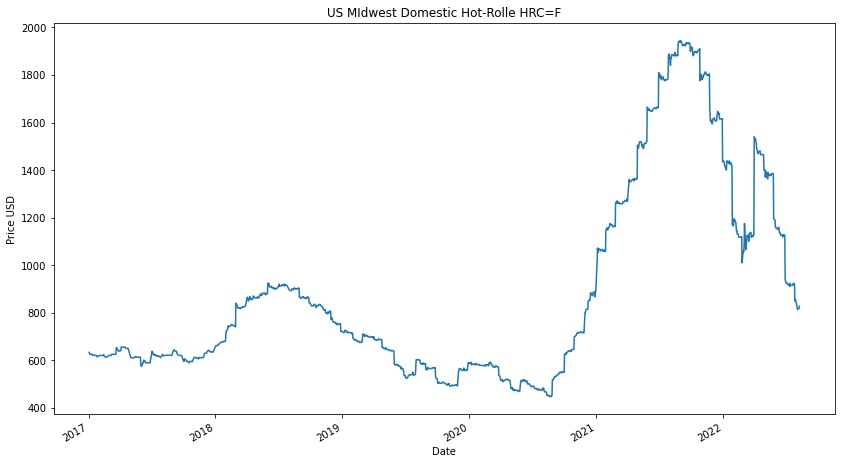

In [8]:
data.plot(figsize=(14,8))
plt.title('US MIdwest Domestic Hot-Rolle HRC=F')
plt.ylabel('Price USD')

In [9]:
u = log_returns.mean()
u

0.00019671396091207823

In [10]:
var = log_returns.var()
var

0.00039473457985943206

In [14]:
stdev = log_returns.std()
stdev

0.019867928423955832

In [15]:
drift = u - (0.5 * var)
drift

-6.533290176377962e-07

In [16]:
np.array(drift)

array(-6.53329018e-07)

In [17]:
np.array(stdev)

array(0.01986793)

In [18]:
#set up a 96% chance of occurance
norm.ppf(0.96)

1.7506860712521692

In [19]:
x = np.random.rand(10,2)
x

array([[0.73064793, 0.28750271],
       [0.94697731, 0.7386175 ],
       [0.49593954, 0.0404819 ],
       [0.46906515, 0.53195143],
       [0.17943448, 0.66021652],
       [0.62781325, 0.96922828],
       [0.29926719, 0.88945679],
       [0.69031357, 0.27828302],
       [0.70230885, 0.87678299],
       [0.61292503, 0.13984569]])

In [20]:
norm.ppf(x)

array([[ 0.61477375, -0.56069507],
       [ 1.61622641,  0.63908907],
       [-0.01017824, -1.74512109],
       [-0.07762004,  0.08017618],
       [-0.9175224 ,  0.41305412],
       [ 0.32606722,  1.86957084],
       [-0.52650932,  1.22364436],
       [ 0.49673938, -0.58794973],
       [ 0.53105263,  1.15905437],
       [ 0.28695086, -1.0810129 ]])

In [21]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.02031659, -1.40993703],
       [-0.3031611 , -1.86468461],
       [-1.16705227,  0.38370835],
       [-1.96080459,  0.2631543 ],
       [ 0.7828321 ,  0.14972386],
       [ 0.17863086, -0.07010253],
       [ 1.73399133,  0.02742815],
       [-0.8241274 , -1.49838429],
       [-0.283113  ,  0.91723228],
       [ 0.49315689,  0.49409402]])

In [22]:
t_intervals = 120
interations = 500

In [23]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, interations)))
daily_returns

array([[1.02664265, 0.99993645, 1.00867026, ..., 0.98851669, 0.99389945,
        0.98968167],
       [0.99438308, 0.99186297, 0.98594087, ..., 1.00023526, 0.9883113 ,
        1.02323147],
       [1.00950834, 0.95908209, 1.01301374, ..., 1.00213154, 1.0143685 ,
        1.00661193],
       ...,
       [1.01949094, 1.0067569 , 0.98826987, ..., 0.9965032 , 0.98331478,
        0.97409769],
       [1.00793293, 1.0165516 , 1.01080726, ..., 0.95517165, 1.00329704,
        0.99939008],
       [0.99086655, 1.02588683, 0.9901363 , ..., 0.99653809, 0.99482674,
        0.9766109 ]])

In [24]:
s_zero = data.iloc[-1]
s_zero

827.0

In [25]:
price_list = np.zeros_like(daily_returns)

In [26]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
price_list[0] = s_zero
price_list

array([[827., 827., 827., ..., 827., 827., 827.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [28]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [29]:
price_list

array([[827.        , 827.        , 827.        , ..., 827.        ,
        827.        , 827.        ],
       [822.35480743, 820.27067872, 815.37309578, ..., 827.19456412,
        817.33344763, 846.21242667],
       [830.17403428, 786.70692011, 825.98414851, ..., 828.95776093,
        829.07730329, 851.80752654],
       ...,
       [980.52273705, 699.44852293, 683.61780009, ..., 713.25840758,
        594.92254324, 647.86990093],
       [988.30115992, 711.02551641, 691.00583409, ..., 681.28420859,
        596.88402398, 647.47474989],
       [979.27456271, 729.43171519, 684.18996093, ..., 678.92566393,
        593.79618579, 632.33089706]])

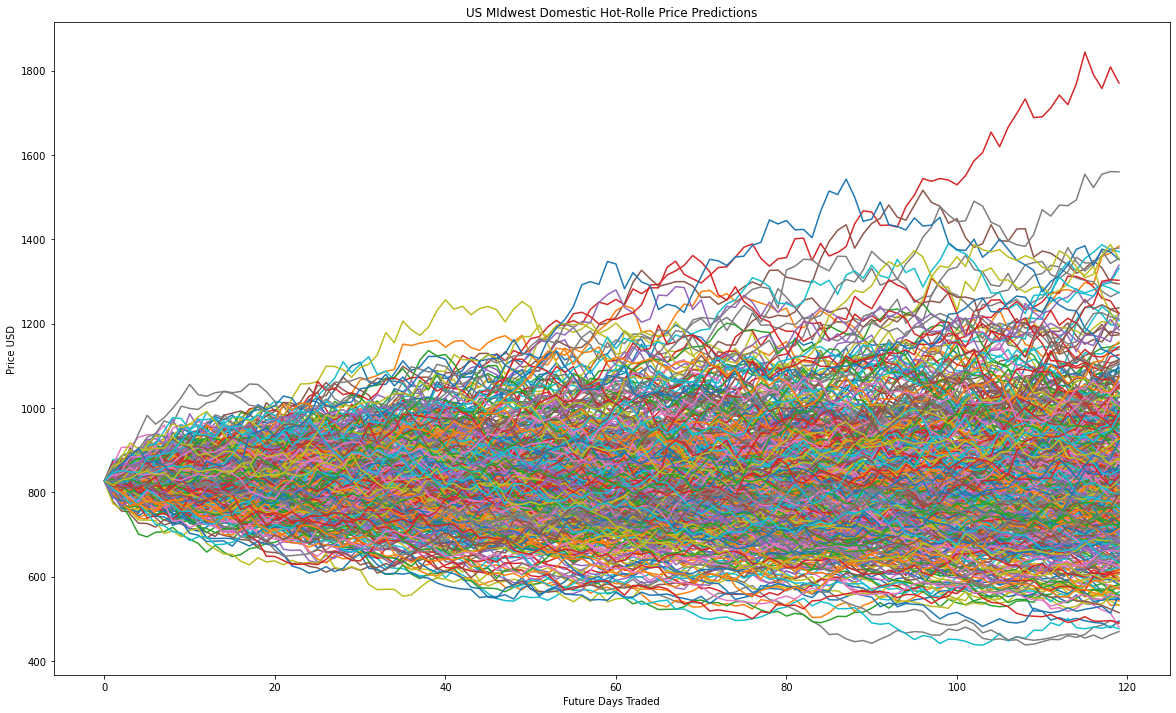

In [30]:
plt.figure(figsize=(20,12))
plt.title('US MIdwest Domestic Hot-Rolle Price Predictions')
plt.xlabel('Future Days Traded')
plt.ylabel('Price USD')
plt.plot(price_list)